# Bellabeat Data Analysis


# Introduction:

Bellabeat is a fitness tech company which was founded by Urška Sršen and Sando Mur in 2013 which specializes in health-focused smart products for women. They have analytics system in place to collect different metrics of people who are using the products such as activity,sleep,calories,weight to provide insights into their health.

Bellabeat's range of products and services includes:

- Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

- Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

- Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

- Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

- Bellabeat membership: Bellabeat also offers a subscription-based membership program for users.Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

#Business task: 

Analyze smart device usage data to gain insights into how non-Bellabeat customers use their smart devices.

Questions for the analysis

1. What are some trends in smart device usage?

2. How could these trends apply to Bellabeat customers?

3. How could these trends help influence Bellabeat’s marketing strategy?

Key Stakeholders:

Urška Sršen — Bellabeat’s cofounder and Chief Creative Officer

Sando Mur — Mathematician and Bellabeat’s cofounder(key member of the Bellabeat executive team).

Bellabeat marketing team - The team in-charge of collecting,analyzing and acting upon analytics to take decision on bellabeat's marketing

#Download the dataset

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
download_url = 'https://www.kaggle.com/arashnic/fitbit'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nitant06
Your Kaggle Key: ··········


100%|██████████| 24.1M/24.1M [00:00<00:00, 91.6MB/s]


# Data Preparation and Cleaning

1. Load the file using pandas
2. Look at info about the data & columns
3. Fix any missing or incorrect values

## Import Files

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import statistics as st

## 1. Daily Activities Dataset

In [ ]:
dailyActivity_filename = './fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv'

In [ ]:
dailyActivity_df = pd.read_csv(dailyActivity_filename)

In [ ]:
dailyActivity_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [ ]:
dailyActivity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [ ]:
dailyActivity_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerics_df = dailyActivity_df.select_dtypes(include=numerics)

len(numerics_df.columns)

14

In [ ]:
count_of_missing_values = dailyActivity_df.isna().sum().sort_values(ascending=False)
count_of_missing_values

Calories                    0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
LoggedActivitiesDistance    0
TrackerDistance             0
TotalDistance               0
TotalSteps                  0
ActivityDate                0
Id                          0
dtype: int64

## Sleep Day Dataset

In [ ]:
sleepDay_filename = './fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv'

In [ ]:
sleepDay_df = pd.read_csv(sleepDay_filename)

In [ ]:
sleepDay_df

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [ ]:
sleepDay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [ ]:
sleepDay_df.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [ ]:
count_of_missing_values = sleepDay_df.isna().sum().sort_values(ascending=False)
count_of_missing_values

TotalTimeInBed        0
TotalMinutesAsleep    0
TotalSleepRecords     0
SleepDay              0
Id                    0
dtype: int64

## Heartrate Seconds Dataset

In [ ]:
heartrate_secs_filename = './fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv'

In [ ]:
heartrate_secs_df = pd.read_csv(heartrate_secs_filename)

In [ ]:
heartrate_secs_df

In [ ]:
heartrate_secs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [ ]:
count_of_missing_values = heartrate_secs_df.isna().sum().sort_values(ascending=False)
count_of_missing_values

Value    0
Time     0
Id       0
dtype: int64

In [ ]:
len(heartrate_secs_df.index)

2483658

In [ ]:
heartrate_secs_df.Value.describe()

count    2.483658e+06
mean     7.732842e+01
std      1.940450e+01
min      3.600000e+01
25%      6.300000e+01
50%      7.300000e+01
75%      8.800000e+01
max      2.030000e+02
Name: Value, dtype: float64

In [ ]:
#Convert Time from String to DateTime

heartrate_secs_df.Time = pd.to_datetime(heartrate_secs_df.Time)

In [ ]:
heartrate_secs_df.Time[0]

Timestamp('2016-04-12 07:21:00')

## Minute METS Dataset

- A MET is a ratio of your working metabolic rate relative to your resting metabolic rate. Metabolic rate is the rate of energy expended per unit of time. It’s one way to describe the intensity of an exercise or activity. One MET is the energy you spend sitting at rest — your resting or basal metabolic rate. So, an activity with a MET value of 4 means you’re exerting four times the energy than you would if you were sitting still.

- To put it in perspective, a brisk walk at 3 or 4 miles per hour has a value of 4 METs. Jumping rope, which is a more vigorous activity, has a MET value of 12.3.

In [ ]:
minute_METS_filename = './fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv'

In [ ]:
minute_METS_df = pd.read_csv(minute_METS_filename)

In [ ]:
minute_METS_df

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,11
1325576,8877689391,5/12/2016 1:56:00 PM,11
1325577,8877689391,5/12/2016 1:57:00 PM,11
1325578,8877689391,5/12/2016 1:58:00 PM,11


In [ ]:
minute_METS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   METs            1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [ ]:
count_of_missing_values = minute_METS_df.isna().sum().sort_values(ascending=False)
count_of_missing_values

METs              0
ActivityMinute    0
Id                0
dtype: int64

In [ ]:
minute_METS_df.ActivityMinute = pd.to_datetime(minute_METS_df.ActivityMinute)

In [ ]:
minute_METS_df.ActivityMinute[0]

Timestamp('2016-04-12 00:00:00')

## Weight Log Info Dataset

In [ ]:
weightLogInfo_filename = './fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv'

In [ ]:
weightLogInfo_df = pd.read_csv(weightLogInfo_filename)

In [ ]:
weightLogInfo_df

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [ ]:
weightLogInfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


# Exploratory Analysis and Visualization

### Daily Activities Dataset
Columns we will analyze

1. Total Steps
2. Calories
3. TotalDistance
4. ActivityDate
5. SedentaryMinutes

In [ ]:
dailyActivity_df['TotalSteps'].describe()

count      940.000000
mean      7637.910638
std       5087.150742
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      36019.000000
Name: TotalSteps, dtype: float64

In [ ]:
dailyActivity_df['Calories'].describe()

count     940.000000
mean     2303.609574
std       718.166862
min         0.000000
25%      1828.500000
50%      2134.000000
75%      2793.250000
max      4900.000000
Name: Calories, dtype: float64

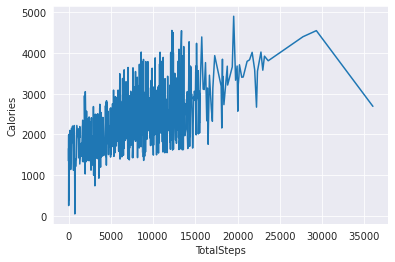

In [ ]:
sns.lineplot(x='TotalSteps',y='Calories',data=dailyActivity_df)

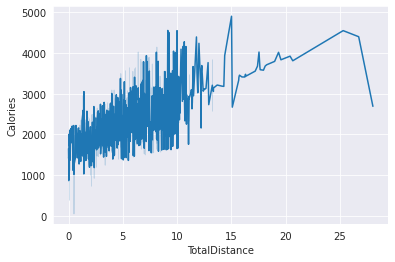

In [ ]:
sns.lineplot(x='TotalDistance',y='Calories',data=dailyActivity_df)

In [ ]:
dailyActivity_df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [ ]:
dailyActivity_df.ActivityDate[0]

'4/12/2016'

In [ ]:
dailyActivity_df.ActivityDate = pd.to_datetime(dailyActivity_df.ActivityDate)

In [ ]:
dailyActivity_df.ActivityDate[0]

Timestamp('2016-04-12 00:00:00')

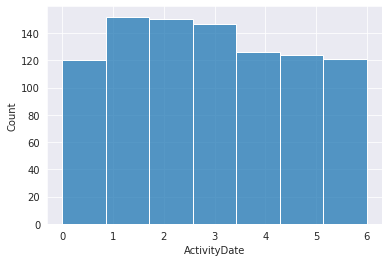

In [ ]:
sns.histplot(dailyActivity_df.ActivityDate.dt.dayofweek,bins=7,kde=False)

In [ ]:
# Day with maximum steps

dailyActivity_df['days'] = dailyActivity_df.ActivityDate.dt.dayofweek

In [ ]:
dailyActivity_df.rename(columns={'dailyAcitivity_days': 'dailyActivity_days'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dailyActivity_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,dailyActivity_days
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,3
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,4
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,6
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,0
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,2


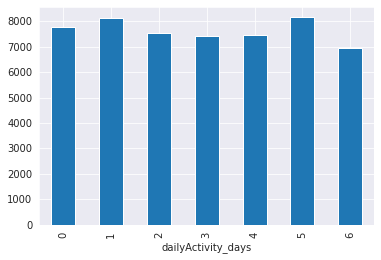

In [ ]:
dailyActivity_df[['dailyActivity_days','TotalSteps']].groupby('dailyActivity_days').mean().plot(kind='bar',legend=False)

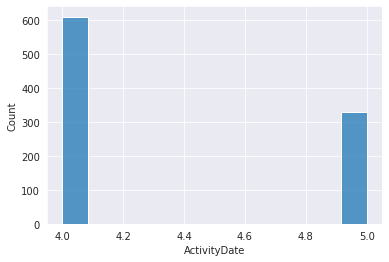

In [ ]:
sns.histplot(dailyActivity_df.ActivityDate.dt.month,bins=12,kde=False)

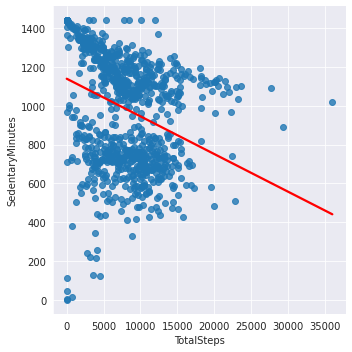

In [ ]:
sns.lmplot(x='TotalSteps',y='SedentaryMinutes',data=dailyActivity_df,ci=None,line_kws={'color':'red'})

**Insights**

- Average steps taken per day are 7637 in dataset.

- Average calories burned per day is 2303.

- The data recorded by tracker was maximum on Mon, Tues and Wed and in the month of April.

- People took maximum steps on Mon and Fri.

- Increase in steps taken decreases the sedentary minutes.


### Sleep Day Dataset

Columns we will analyze

1. TotalMinutesAsleep
2. TotalTimeInBed
3. SleepDay

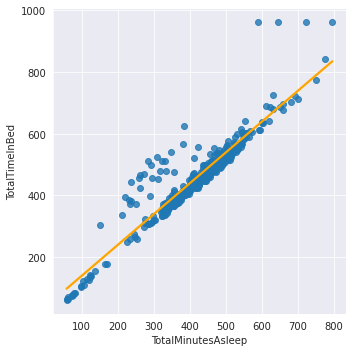

In [ ]:
sns.lmplot(x='TotalMinutesAsleep',y='TotalTimeInBed',data=sleepDay_df,ci=None,line_kws={'color':'orange'})


In [ ]:
sleepDay_df['TotalTimeInBed'].describe()

count    413.000000
mean     458.639225
std      127.101607
min       61.000000
25%      403.000000
50%      463.000000
75%      526.000000
max      961.000000
Name: TotalTimeInBed, dtype: float64

In [ ]:
sleepDay_df.SleepDay = pd.to_datetime(sleepDay_df.SleepDay)

In [ ]:
sleepDay_df.SleepDay[0]

Timestamp('2016-04-12 00:00:00')

In [ ]:
sleepDay_df['day'] = sleepDay_df['SleepDay'].dt.dayofweek

sleepDay_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day
0,1503960366,2016-04-12,1,327,346,1
1,1503960366,2016-04-13,2,384,407,2
2,1503960366,2016-04-15,1,412,442,4
3,1503960366,2016-04-16,2,340,367,5
4,1503960366,2016-04-17,1,700,712,6


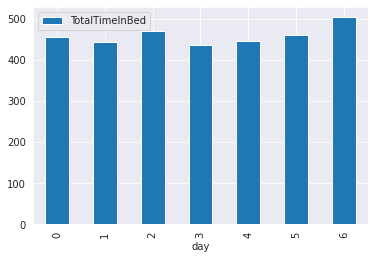

In [ ]:
sleepDay_df[['day','TotalTimeInBed']].groupby('day').mean().plot(kind='bar')

- Insights
1. MinutesAsleep and Time in bed are linearly dependent.
2. Average sleeping time of a person is ~8 hrs (458 mins)
3. People sleep more on Tues and Sat

### Heartrate Seconds Dataset

Columns we will analyze

1. Time
2. Value

In [ ]:
heartrate_secs_df['days'] = heartrate_secs_df['Time'].dt.dayofweek

In [ ]:
heartrate_secs_df.rename(columns={'days': 'heartrate_secs_days'}, inplace=True)

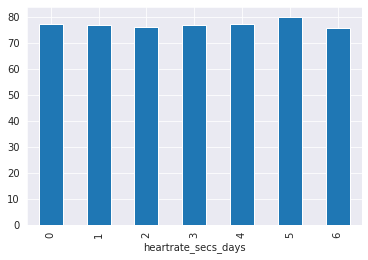

In [ ]:
heartrate_secs_df[['heartrate_secs_days','Value']].groupby('heartrate_secs_days').mean().plot(kind='bar',legend=False)

In [ ]:
heartrate_secs_df['heartrate_secs_hour'] = heartrate_secs_df['Time'].dt.hour

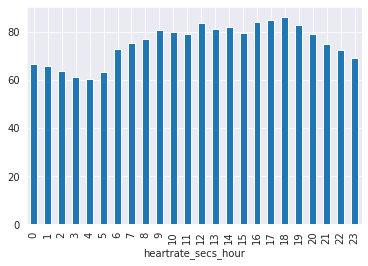

In [ ]:
heartrate_secs_df[['heartrate_secs_hour','Value']].groupby('heartrate_secs_hour').mean().plot(kind='bar',legend=False)

**Insights**

1. Average heartbeat of a person is 77.4.
2. Heartbeats show an increase in trend between 10 a.m to 6 p.m (or 18 p.m)

### Minute METS Dataset

Columns we will analyze

1. ActivityMinute
2. METs

In [ ]:
int_METS = minute_METS_df['METs'].astype(int)

In [ ]:
int_METS.describe()

count    1.325580e+06
mean     1.469001e+01
std      1.205541e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.100000e+01
max      1.570000e+02
Name: METs, dtype: float64

In [ ]:
minute_METS_df['minute_METS_days'] = minute_METS_df.ActivityMinute.dt.dayofweek

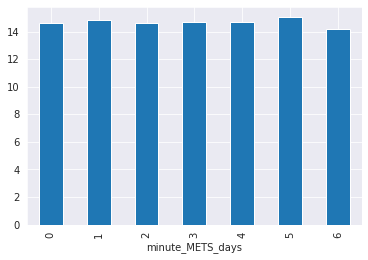

In [ ]:
minute_METS_df[['minute_METS_days','METs']].groupby('minute_METS_days').mean().plot(kind='bar',legend=False)

In [ ]:
minute_METS_df['minute_METS_hour'] = minute_METS_df.ActivityMinute.dt.hour

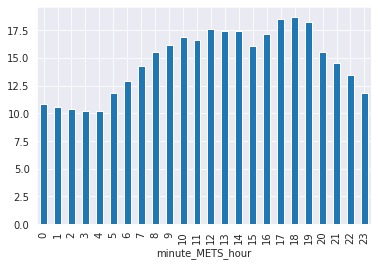

In [ ]:
minute_METS_df[['minute_METS_hour','METs']].groupby('minute_METS_hour').mean().plot(kind='bar',legend=False)

**Insights**

1. Average MET score is 14.2.
2. MET score was highest on Friday.
3. MET scores show an increase in trend between 10 a.m to 6 p.m (or 18 p.m)

### Weight Log Info Dataset

In [ ]:
weightLogInfo_df['WeightKg'].describe()

count     67.000000
mean      72.035821
std       13.923206
min       52.599998
25%       61.400002
50%       62.500000
75%       85.049999
max      133.500000
Name: WeightKg, dtype: float64

In [ ]:
weightLogInfo_df['BMI'].describe()

count    67.000000
mean     25.185224
std       3.066963
min      21.450001
25%      23.959999
50%      24.389999
75%      25.559999
max      47.540001
Name: BMI, dtype: float64

**Insights**

1. Average weight of a person is 72.03(.kg)
2. Average BMI of a person is 25.18

## Ask and Answer Questions
1. Why the calorie count falls when the steps or distance increase?
2. Why there were less participants in the month of MAY compared to other months?

## Summary and Conclusion

**Things learned from the dataset**

1. More steps taken everyday results in high calorie burn.

2. Sedentary minutes is inversionally proportional to steps taken and can hence result in severe diseases in the long run.

3. People are more active on Monday and at the start of the weekend.

4. People take a sound sleep on Weekends and least on weekdays.

5. The heartbeat and METs show an upward trend between 9 a.m to 6 p.m which can be due to work stress.

6. Weight and BMI of the people were found to be normal but it could have more analyzed if the sample size would have been larger.



**Recommendation**

1. Bellabeat app can have feature of daily target steps, to keep people on the track of calories burning, if people don't reach their target, they may receive reminder message for not finishing their minimum steps target.It will become  easier for people to increase their steps instead of monitoring their calories only.

2. For the people who want to burn their calories faster, Bellabeat app can also monitor users' activity's intensity, which would help them in knowing when they reach out to high or medium intensities and can arrange their plan in a more flexible manner.

3. Collect more weight and BMI information by providing perks to the users.

4. Remind users to stand up and stretch after having sedentary time for quite a while.

5. Alert users to take some short steps between their work schedule to have a healthy heart.

6. Target people who have desk jobs.

**Membership Recommendation**

1. Have 30 day free trial for users to try out every feature.

2. Offer referal discount and free months.

3. Offer latest news on diet and fitness on the app.